# Creating IPL team (playing 11) From last 4 years of data (2021-2024) From espn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
batsmen_df = pd.read_csv("last_4years_batsmen.csv")
bowlers_df = pd.read_csv("last_4years_bowlers.csv")

In [5]:
batsmen_df

,Unnamed: 0,Player Name,Team,Year,Mat,Inns,NO,Runs,HS,Ave,SR,100,50,0,4s,6s
0,1,V Kohli,RCB,2024,15,15,3,741,113,61.75,154.69,1,5,0,62,38
1,2,RD Gaikwad,CSK,2024,14,14,3,583,108,53.00,141.16,1,4,2,58,18
2,3,R Parag,RR,2024,16,14,3,573,84,52.09,149.21,0,4,0,40,33
3,4,TM Head,SRH,2024,15,15,1,567,102,40.50,191.55,1,4,3,64,32
4,5,SV Samson,RR,2024,16,15,4,531,86,48.27,153.46,0,5,1,48,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,KL Nagarkoti,KKR,2021,1,1,0,0,0,0.00,0.00,0,0,1,0,0
599,600,Anuj Rawat,RR,2021,2,1,0,0,0,0.00,0.00,0,0,1,0,0
600,601,K Yadav,RR,2021,1,1,1,0,0,0.00,0.00,0,0,0,0,0
601,602,JDS Neesham,MI,2021,3,2,0,0,0,0.00,0.00,0,0,2,0,0


In [7]:
bowlers_df

,Unnamed: 0,Player Name,Team,Year,Mat,Inns,Balls,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,1,HV Patel,PBKS,2024,14,14,294,49,0,477,24,3/15,19.87,9.73,12.25,0,0
1,2,CV Varun,KKR,2024,15,14,300,50,0,402,21,3/16,19.14,8.04,14.28,0,0
2,3,JJ Bumrah,MI,2024,13,13,311,51,0,336,20,5/21,16.80,6.48,15.55,0,1
3,4,AD Russell,KKR,2024,15,14,176,29,0,295,19,3/19,15.52,10.05,9.26,0,0
4,5,Harshit Rana,KKR,2024,13,11,253,42,1,383,19,3/24,20.15,9.08,13.31,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,389,R Parag,RR,2021,11,6,37,6,0,73,1,1/7,73.00,11.83,37.00,0,0
389,390,FA Allen,PBKS,2021,4,3,66,11,1,90,1,1/22,90.00,8.18,66.00,0,0
390,391,NT Ellis,PBKS,2021,3,3,66,11,0,90,1,1/12,90.00,8.18,66.00,0,0
391,392,M Ashwin,PBKS,2021,3,3,66,11,0,97,1,1/32,97.00,8.81,66.00,0,0


In [9]:
# Basic descriptive statistics for batsmen
print("Batsmen Descriptive Stats:")
batsmen_df[['Runs', 'Ave', 'SR', '100', '50', '4s', '6s']].describe()


Batsmen Descriptive Stats:


,Runs,Ave,SR,100,50,4s,6s
count,603.000000,600.000000,600.000000,603.000000,603.000000,603.000000,603.000000
mean,148.890547,20.024167,123.655800,0.560531,1.024876,13.122720,6.854063
std,166.808048,14.549816,43.266816,7.044300,3.715065,16.182869,8.478344
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,8.000000,100.000000,0.000000,0.000000,1.000000,0.000000
50%,75.000000,18.000000,127.550000,0.000000,0.000000,6.000000,3.000000
75%,241.500000,29.392500,147.220000,0.000000,1.000000,21.000000,11.000000
max,890.000000,75.660000,400.000000,100.000000,50.000000,85.000000,45.000000


In [11]:
# Basic descriptive statistics for bowlers
print("Bowlers Descriptive Stats:")
bowlers_df[['Wkts', 'Econ', 'SR', 'Mat', 'Balls', 'Overs']].describe()

Bowlers Descriptive Stats:


,Wkts,Econ,SR,Mat,Balls,Overs
count,393.000000,390.000000,390.000000,393.000000,393.000000,393.000000
mean,8.104326,8.913795,22.645769,8.669211,157.147583,26.053435
std,6.363304,1.722570,11.036018,4.783848,106.582265,17.712693
min,0.000000,4.000000,3.000000,0.000000,0.000000,0.000000
25%,3.000000,7.812500,15.785000,5.000000,66.000000,11.000000
50%,6.000000,8.740000,19.565000,9.000000,134.000000,22.000000
75%,12.000000,9.805000,26.200000,13.000000,249.000000,41.000000
max,32.000000,16.000000,72.000000,17.000000,408.000000,68.000000


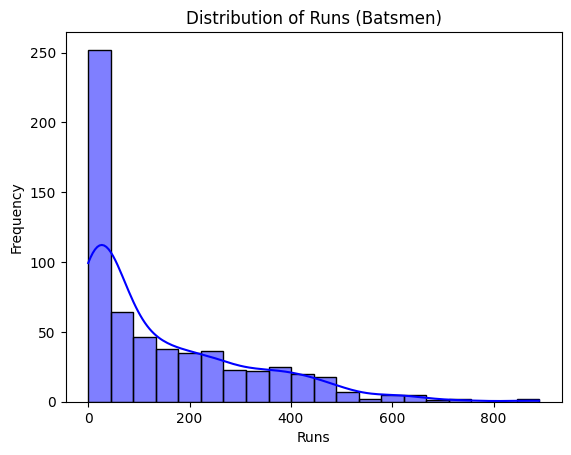

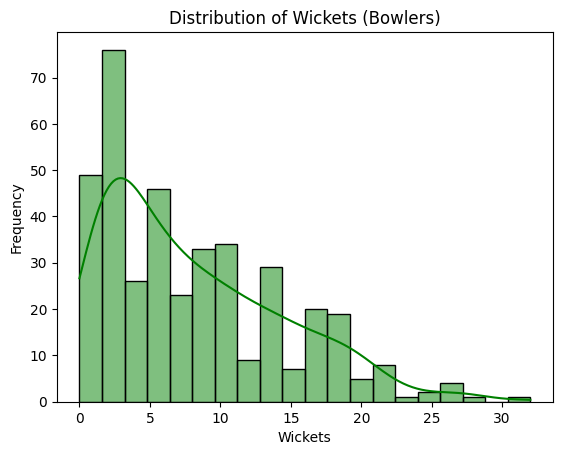

In [13]:
# Step 1: Visualize Distribution of Key Stats
# Distribution for batsmen
sns.histplot(batsmen_df['Runs'], kde=True, color='blue', bins=20)
plt.title('Distribution of Runs (Batsmen)')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

# Distribution for bowlers
sns.histplot(bowlers_df['Wkts'], kde=True, color='green', bins=20)
plt.title('Distribution of Wickets (Bowlers)')
plt.xlabel('Wickets')
plt.ylabel('Frequency')
plt.show()

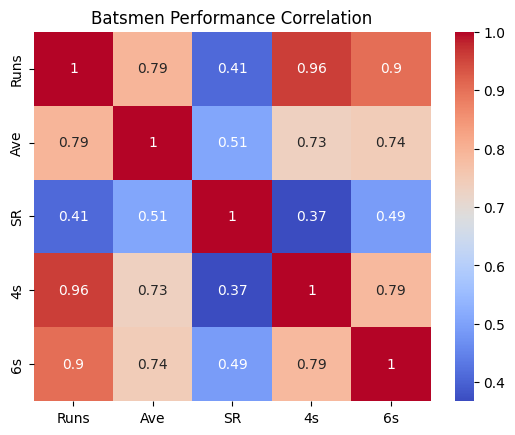

In [15]:
# Step 2: Correlation analysis for batsmen (Runs, Ave, SR, 4s, 6s)
batsmen_corr = batsmen_df[['Runs', 'Ave', 'SR', '4s', '6s']].corr()
sns.heatmap(batsmen_corr, annot=True, cmap='coolwarm')
plt.title('Batsmen Performance Correlation')
plt.show()

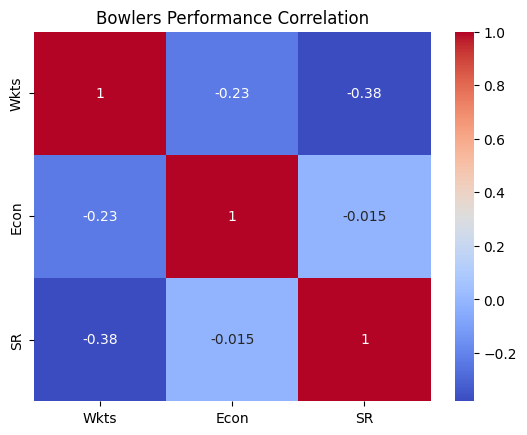

In [17]:
# Step 3: Correlation analysis for bowlers (Wkts, Econ, SR)
bowlers_corr = bowlers_df[['Wkts', 'Econ', 'SR']].corr()
sns.heatmap(bowlers_corr, annot=True, cmap='coolwarm')
plt.title('Bowlers Performance Correlation')
plt.show()

In [19]:
# Step 4: Performance by Team - Batsmen
team_batsmen_performance = batsmen_df.groupby('Team').agg({
    'Runs': 'sum',
    'Ave': 'mean',
    'SR': 'mean'
}).sort_values(by='Runs', ascending=False)

team_batsmen_performance

,Runs,Ave,SR
Team,,,
RCB,9809,18.973231,119.776154
CSK,9772,26.108333,136.222917
RR,9707,19.090476,115.117778
MI,9351,18.784545,121.345909
KKR,9342,18.890484,128.350484
SRH,9212,18.764658,124.658904
DC,9128,19.577059,120.468235
PBKS,9036,19.250870,122.216087
GT,7350,22.244286,125.141190


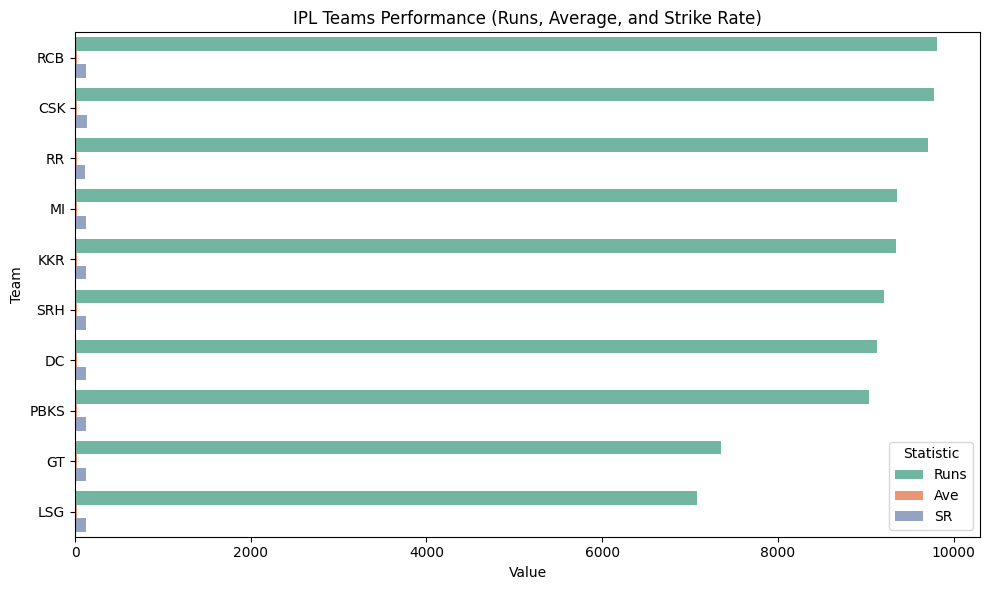

In [31]:
plt.figure(figsize=(10, 6))

# Create a bar plot for Runs, Ave, and SR
df_melted = df.melt(id_vars="Team", value_vars=["Runs", "Ave", "SR"], var_name="Statistic", value_name="Value")

# Create the plot
sns.barplot(x="Value", y="Team", hue="Statistic", data=df_melted, dodge=True, palette="Set2")

# Set plot labels and title
plt.xlabel("Value")
plt.ylabel("Team")
plt.title("IPL Teams Performance (Runs, Average, and Strike Rate)")
plt.legend(title="Statistic")

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\phane\AppData\Local\Temp\ipykernel_12016\4027742381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


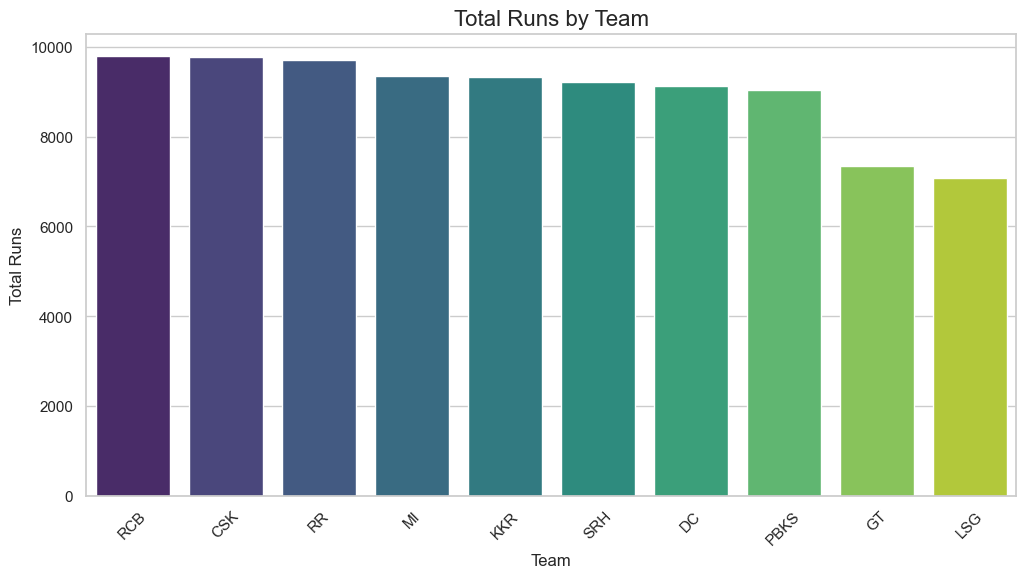

In [33]:
team_batsmen_performance = team_batsmen_performance.reset_index()

# Set the plot style
sns.set_theme(style="whitegrid")

# Plot total runs by team
plt.figure(figsize=(12, 6))
sns.barplot(
    data=team_batsmen_performance, 
    x='Team', 
    y='Runs', 
    palette='viridis'
)
plt.title('Total Runs by Team', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)
plt.xticks(rotation=45)
plt.show()

C:\Users\phane\AppData\Local\Temp\ipykernel_12016\1873495995.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


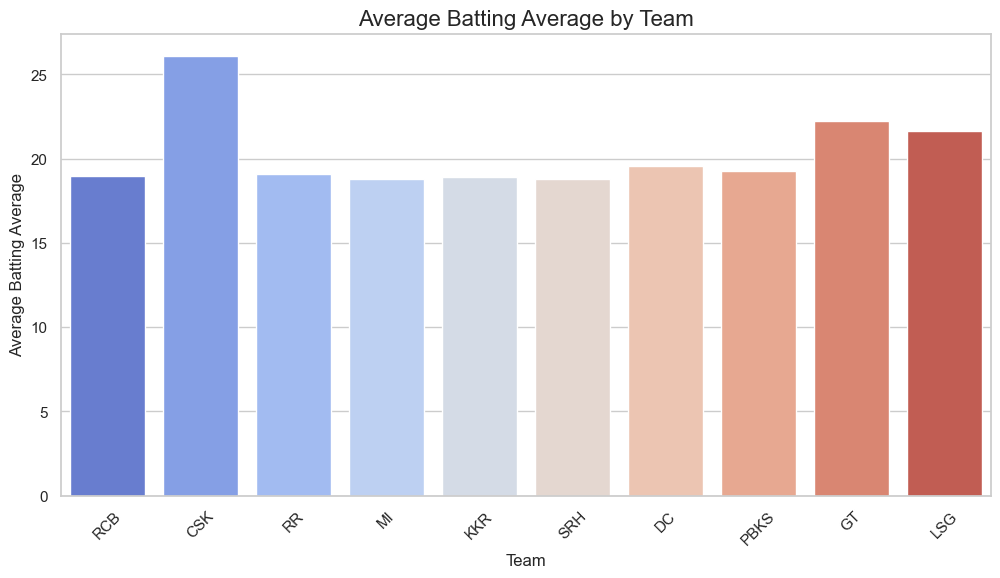

In [34]:
# Plot average batting average by team
plt.figure(figsize=(12, 6))
sns.barplot(
    data=team_batsmen_performance, 
    x='Team', 
    y='Ave', 
    palette='coolwarm'
)
plt.title('Average Batting Average by Team', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Average Batting Average', fontsize=12)
plt.xticks(rotation=45)
plt.show()

C:\Users\phane\AppData\Local\Temp\ipykernel_12016\4116146048.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


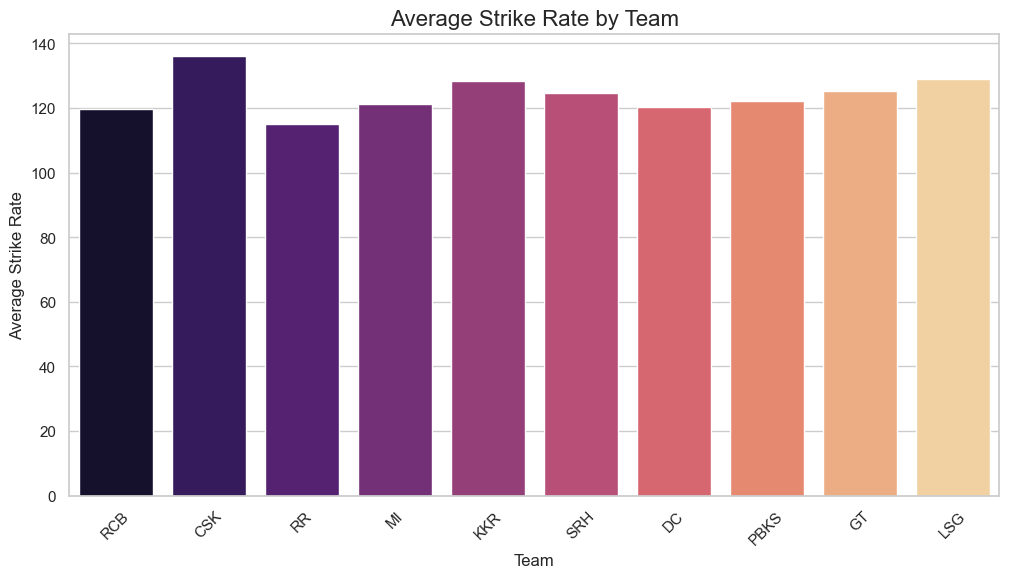

In [37]:


# Plot average strike rate by team
plt.figure(figsize=(12, 6))
sns.barplot(
    data=team_batsmen_performance, 
    x='Team', 
    y='SR', 
    palette='magma'
)
plt.title('Average Strike Rate by Team', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Average Strike Rate', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [53]:
# Step 5: Performance by Team - Bowlers
team_bowlers_performance = bowlers_df.groupby('Team').agg({
    'Wkts': 'sum',
    'Econ': 'mean',
    'SR': 'mean'
}).sort_values(by='Wkts', ascending=False)

pd.DataFrame(team_bowlers_performance)

,Wkts,Econ,SR
Team,,,
KKR,355,8.854444,20.145000
CSK,354,8.481818,22.900682
DC,350,8.815714,22.443095
RCB,346,8.961500,21.312250
RR,327,9.082059,22.127353
MI,323,9.375208,23.770208
PBKS,315,8.615610,25.500000
SRH,294,9.066818,24.213636
GT,274,9.035714,20.424643


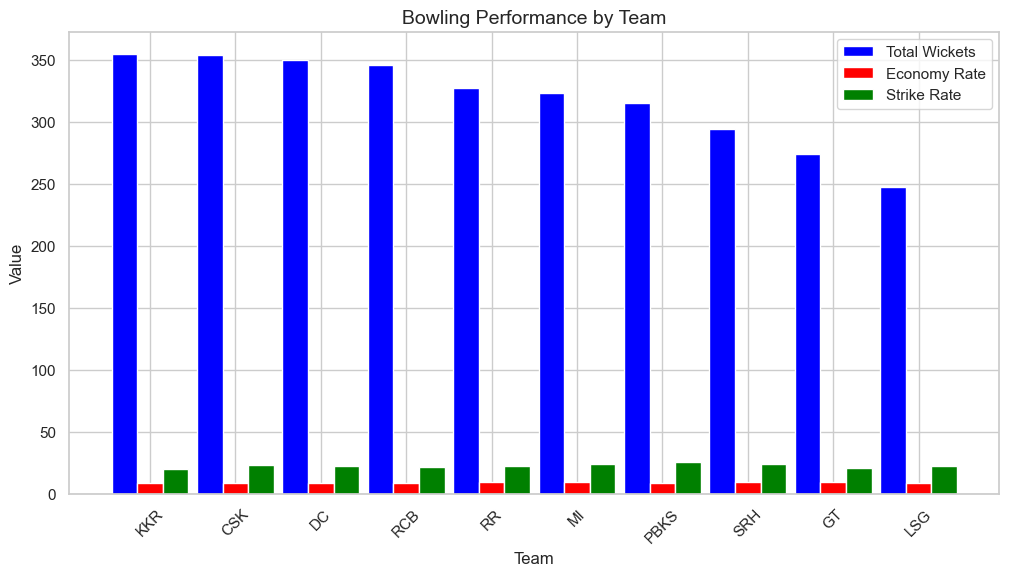

In [57]:
# Define X-axis positions
teams = team_bowlers_performance.index
x = np.arange(len(teams))  # X positions for groups

# Define bar width
bar_width = 0.3

# Create figure and axes
plt.figure(figsize=(12, 6))

# Plot bars for each metric
plt.bar(x - bar_width, team_bowlers_performance['Wkts'], width=bar_width, label='Total Wickets', color='blue')
plt.bar(x, team_bowlers_performance['Econ'], width=bar_width, label='Economy Rate', color='red')
plt.bar(x + bar_width, team_bowlers_performance['SR'], width=bar_width, label='Strike Rate', color='green')

# Labels and title
plt.xlabel("Team", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.title("Bowling Performance by Team", fontsize=14)
plt.xticks(x, teams, rotation=45)  # Set team names as X labels
plt.legend()  # Show legend

# Show the plot
plt.show()

C:\Users\phane\AppData\Local\Temp\ipykernel_12016\2605246468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=batsmen_df, x='Team', palette="Set1")


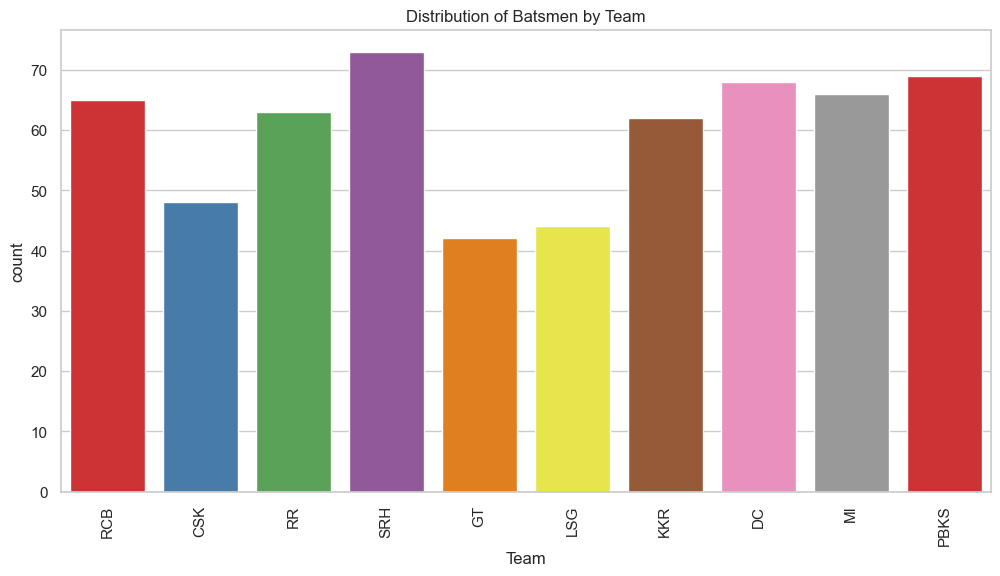

In [67]:
# 3. Count Plot for categorical variable 'Team' (Batsmen and Bowlers)
plt.figure(figsize=(12, 6))
sns.countplot(data=batsmen_df, x='Team', palette="Set1")
plt.title('Distribution of Batsmen by Team')
plt.xticks(rotation=90)
plt.show()


C:\Users\phane\AppData\Local\Temp\ipykernel_12016\2535259508.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bowlers_df, x='Team', palette="Set1")


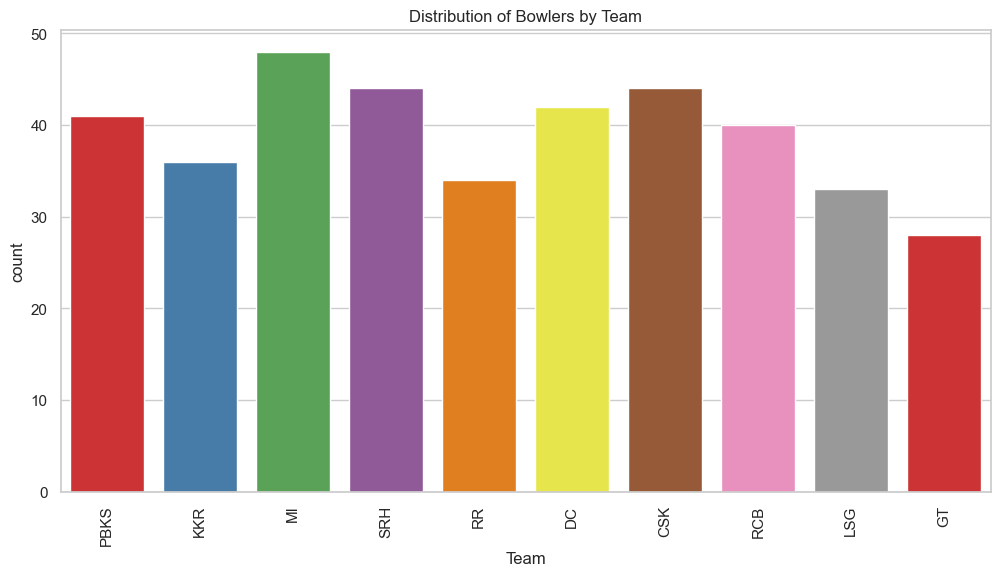

In [63]:
plt.figure(figsize=(12, 6))
sns.countplot(data=bowlers_df, x='Team', palette="Set1")
plt.title('Distribution of Bowlers by Team')
plt.xticks(rotation=90)
plt.show()

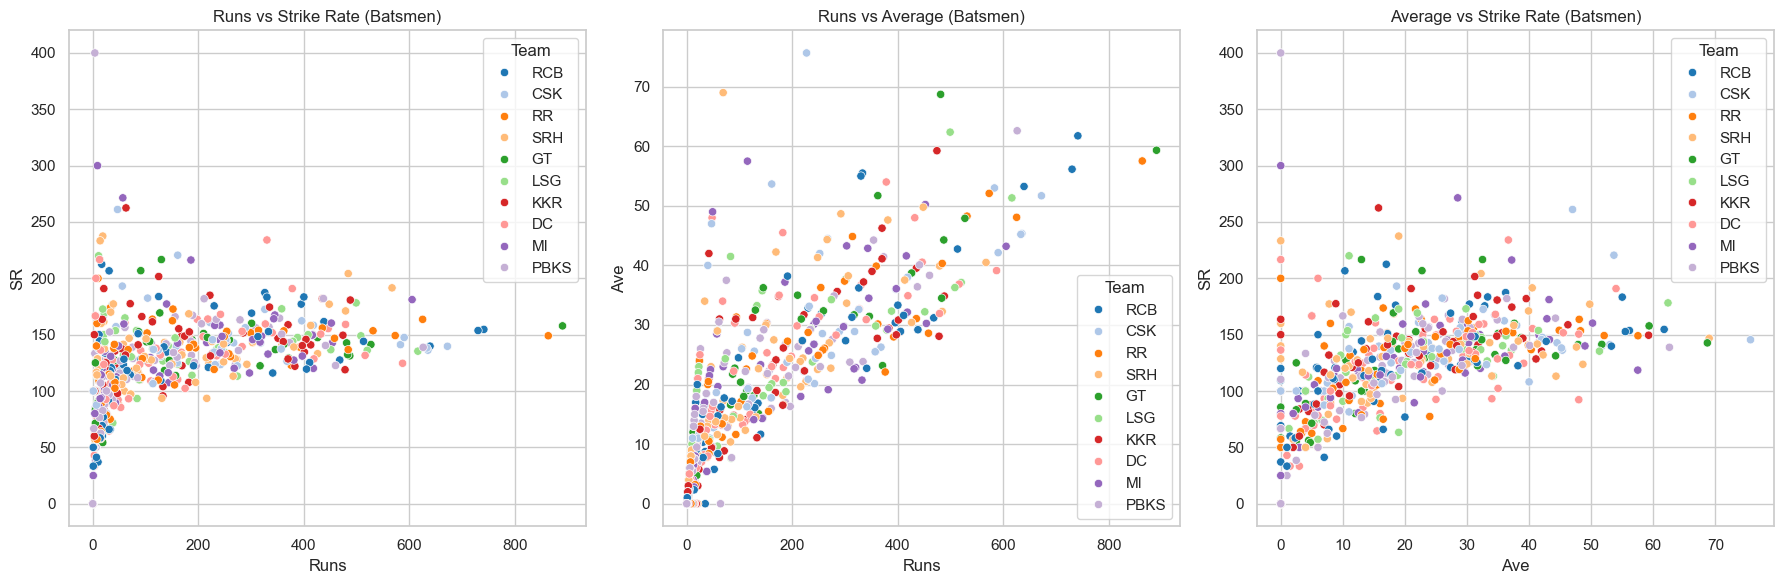

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Get all unique teams
unique_teams = batsmen_df['Team'].unique()

# Generate a unique color palette for all teams
team_palette = sns.color_palette("tab20", len(unique_teams))  # "tab20" supports up to 20 colors
team_color_map = dict(zip(unique_teams, team_palette))  # Create a dictionary mapping teams to colors

# Scatter plot: Runs vs SR (Hue by Team)
sns.scatterplot(data=batsmen_df, x='Runs', y='SR', hue='Team', palette=team_color_map, ax=axes[0])
axes[0].set_title('Runs vs Strike Rate (Batsmen)')

# Scatter plot: Runs vs Ave (Hue by Team)
sns.scatterplot(data=batsmen_df, x='Runs', y='Ave', hue='Team', palette=team_color_map, ax=axes[1])
axes[1].set_title('Runs vs Average (Batsmen)')

# Scatter plot: Ave vs SR (Hue by Team)
sns.scatterplot(data=batsmen_df, x='Ave', y='SR', hue='Team', palette=team_color_map, ax=axes[2])
axes[2].set_title('Average vs Strike Rate (Batsmen)')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


C:\Users\phane\AppData\Local\Temp\ipykernel_12016\3673394413.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Team', y='SR', data=batsmen_df, palette='Set1')


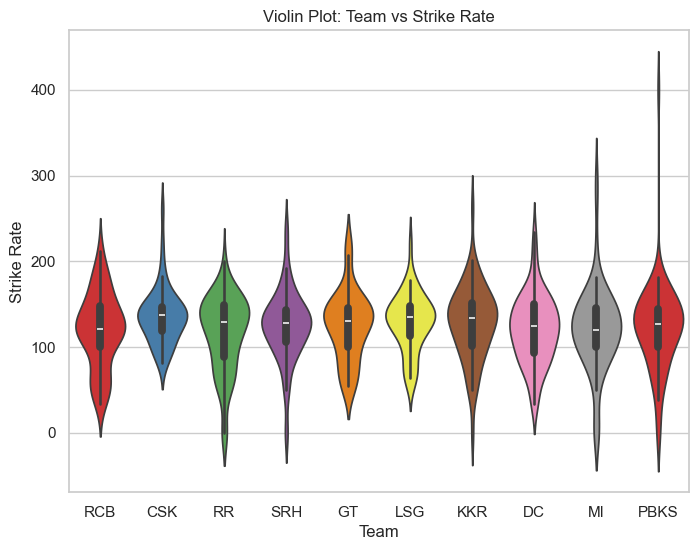

In [77]:
# Violin plot for Runs vs SR
plt.figure(figsize=(8, 6))
sns.violinplot(x='Team', y='SR', data=batsmen_df, palette='Set1')
plt.title('Violin Plot: Team vs Strike Rate')
plt.xlabel('Team')
plt.ylabel('Strike Rate')
plt.show()

C:\Users\phane\AppData\Local\Temp\ipykernel_12016\1027929675.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Team', y='Ave', data=batsmen_df, palette='Set1')


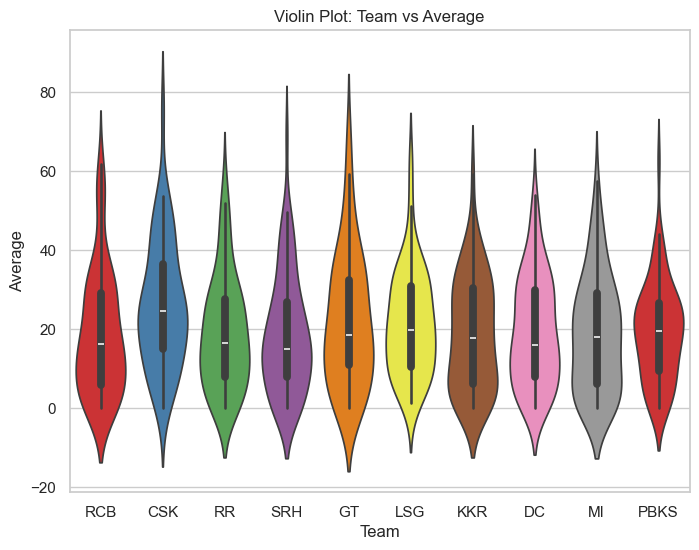

In [79]:
# Violin plot for Runs vs Ave
plt.figure(figsize=(8, 6))
sns.violinplot(x='Team', y='Ave', data=batsmen_df, palette='Set1')
plt.title('Violin Plot: Team vs Average')
plt.xlabel('Team')
plt.ylabel('Average')
plt.show()

C:\Users\phane\AppData\Local\Temp\ipykernel_12016\1846738176.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Team', y='SR', data=batsmen_df, palette='Set1')


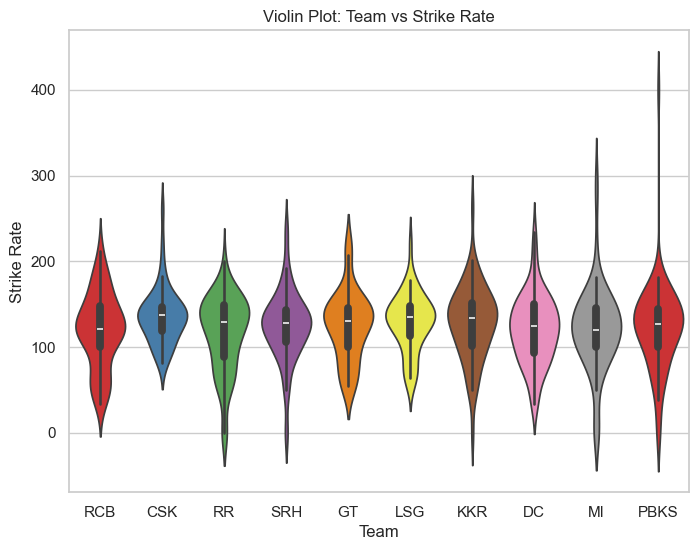

In [81]:
# Violin plot for Ave vs SR
plt.figure(figsize=(8, 6))
sns.violinplot(x='Team', y='SR', data=batsmen_df, palette='Set1')
plt.title('Violin Plot: Team vs Strike Rate')
plt.xlabel('Team')
plt.ylabel('Strike Rate')
plt.show()

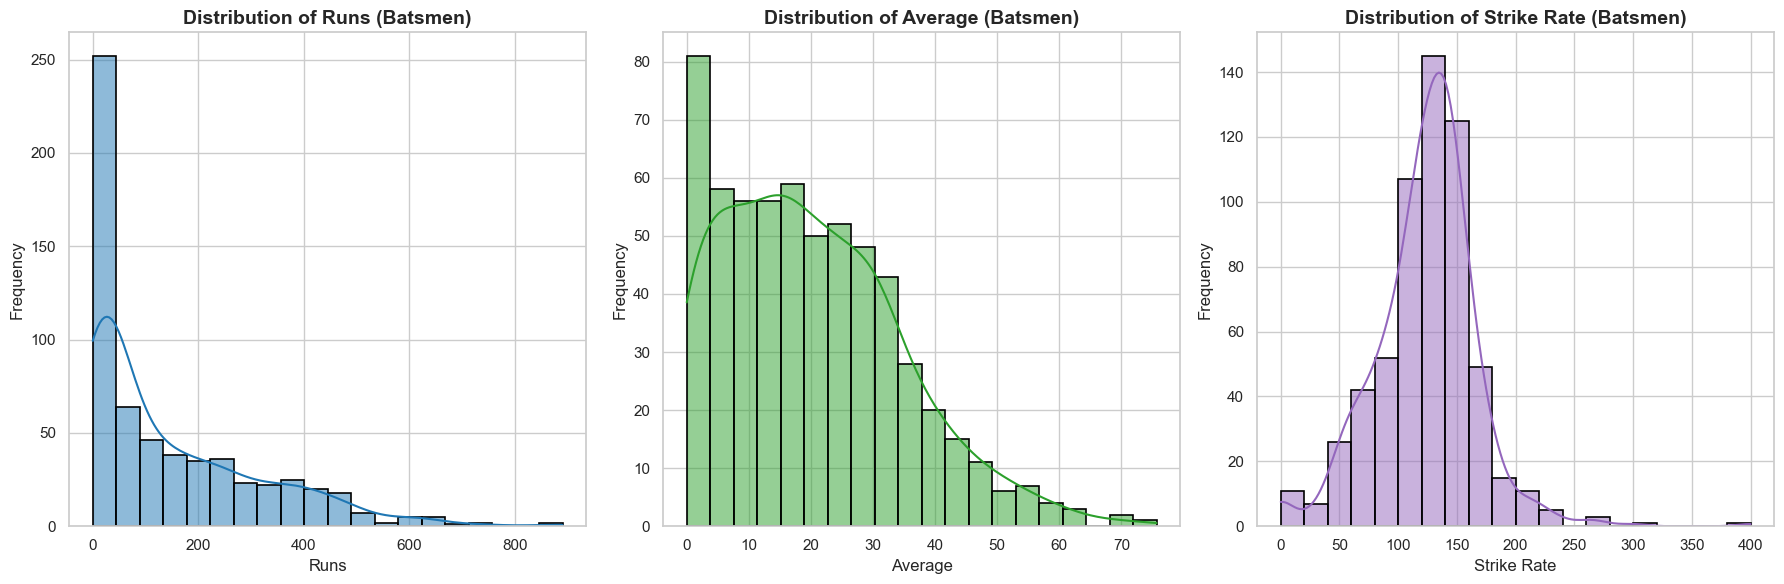

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")

# Define a color palette
colors = ['#1f77b4', '#2ca02c', '#9467bd']  # Blue, Green, Purple

# Create subplots for better alignment
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram: Runs
sns.histplot(batsmen_df['Runs'], kde=True, color=colors[0], bins=20, edgecolor='black', linewidth=1.2, ax=axes[0])
axes[0].set_title('Distribution of Runs (Batsmen)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Runs', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Histogram: Average
sns.histplot(batsmen_df['Ave'], kde=True, color=colors[1], bins=20, edgecolor='black', linewidth=1.2, ax=axes[1])
axes[1].set_title('Distribution of Average (Batsmen)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Average', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

# Histogram: Strike Rate
sns.histplot(batsmen_df['SR'], kde=True, color=colors[2], bins=20, edgecolor='black', linewidth=1.2, ax=axes[2])
axes[2].set_title('Distribution of Strike Rate (Batsmen)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Strike Rate', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


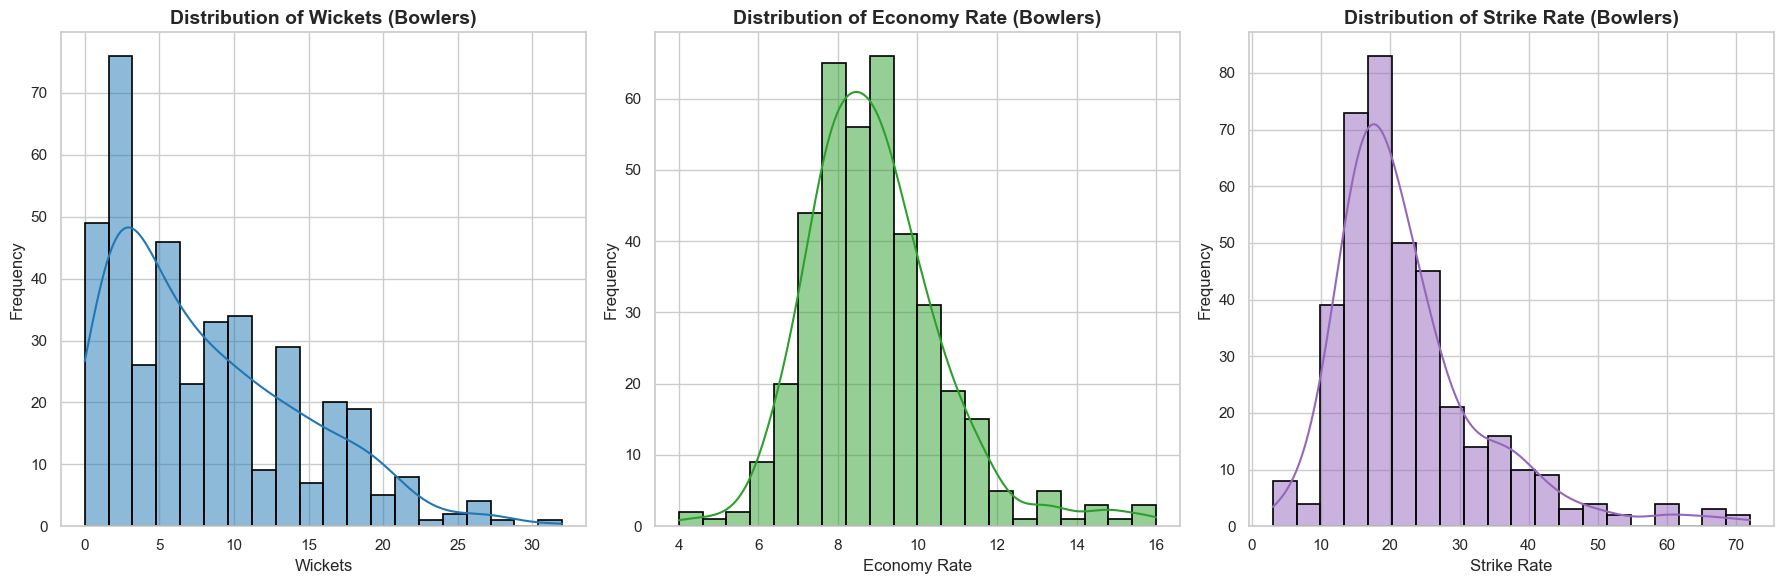

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")

# Define a color palette
colors = ['#1f77b4', '#2ca02c', '#9467bd']  # Blue, Green, Purple

# Create subplots for better alignment
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram: Wickets
sns.histplot(bowlers_df['Wkts'], kde=True, color=colors[0], bins=20, edgecolor='black', linewidth=1.2, ax=axes[0])
axes[0].set_title('Distribution of Wickets (Bowlers)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Wickets', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Histogram: Economy Rate
sns.histplot(bowlers_df['Econ'], kde=True, color=colors[1], bins=20, edgecolor='black', linewidth=1.2, ax=axes[1])
axes[1].set_title('Distribution of Economy Rate (Bowlers)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Economy Rate', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

# Histogram: Strike Rate
sns.histplot(bowlers_df['SR'], kde=True, color=colors[2], bins=20, edgecolor='black', linewidth=1.2, ax=axes[2])
axes[2].set_title('Distribution of Strike Rate (Bowlers)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Strike Rate', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\phane\AppData\Local\Temp\ipykernel_12016\3365773214.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bowlers_df, x='Team', y='Wkts', palette=team_color_map)


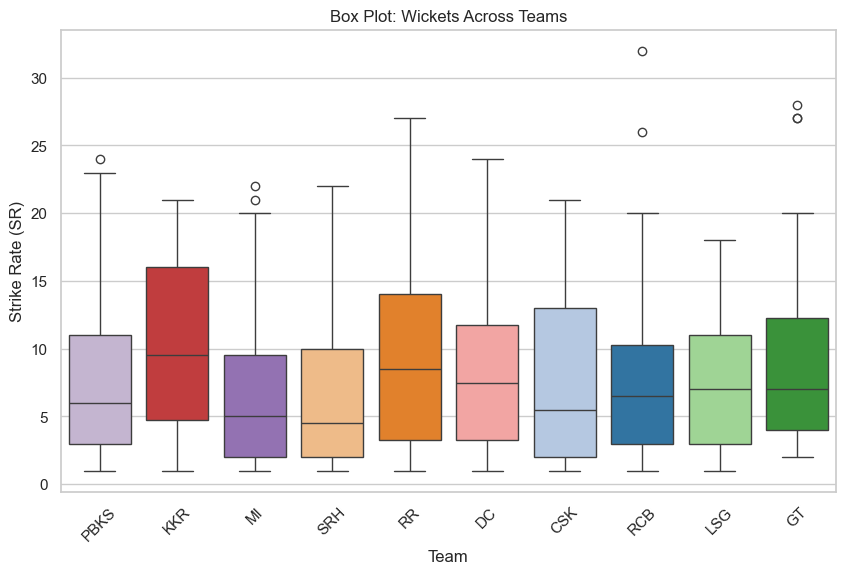

In [119]:
# Get all unique teams
unique_teams = batsmen_df['Team'].unique()

# Generate a unique color palette for all teams
team_palette = sns.color_palette("tab20", len(unique_teams))  # "tab20" supports up to 20 colors
team_color_map = dict(zip(unique_teams, team_palette)) 


plt.figure(figsize=(10, 6))
sns.boxplot(data=bowlers_df, x='Team', y='Wkts', palette=team_color_map)
plt.title('Box Plot: Wickets Across Teams')
plt.xlabel('Team')
plt.ylabel('Strike Rate (SR)')
plt.xticks(rotation=45)
plt.show()

C:\Users\phane\AppData\Local\Temp\ipykernel_12016\4158294227.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=bowlers_df, x='Team', y='SR', palette=team_color_map, saturation=0.75)


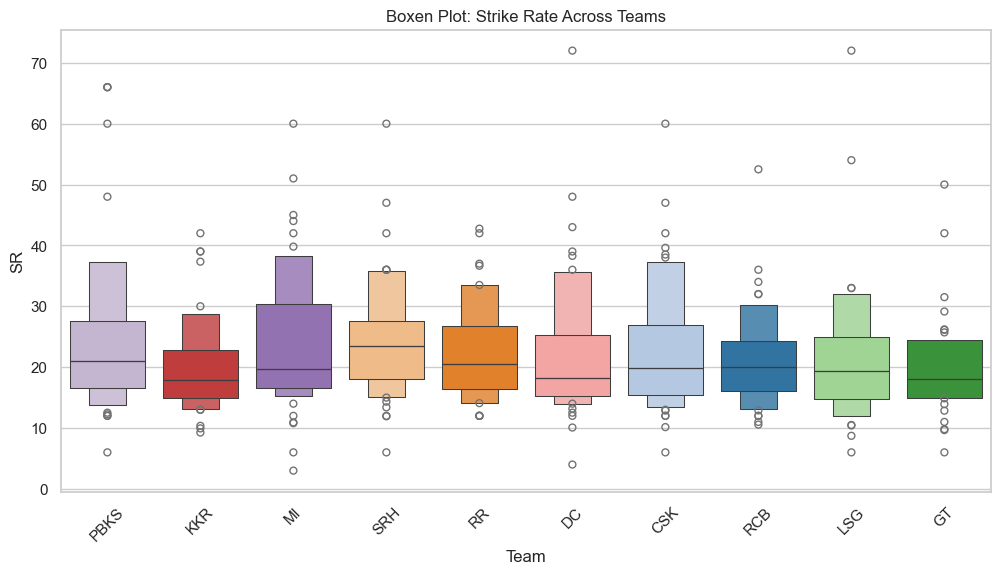

In [121]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=bowlers_df, x='Team', y='SR', palette=team_color_map, saturation=0.75)
plt.title('Boxen Plot: Strike Rate Across Teams')
plt.xticks(rotation=45)
plt.show()


C:\Users\phane\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\phane\AppData\Local\Temp\ipykernel_12016\3420066945.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x500 with 0 Axes>

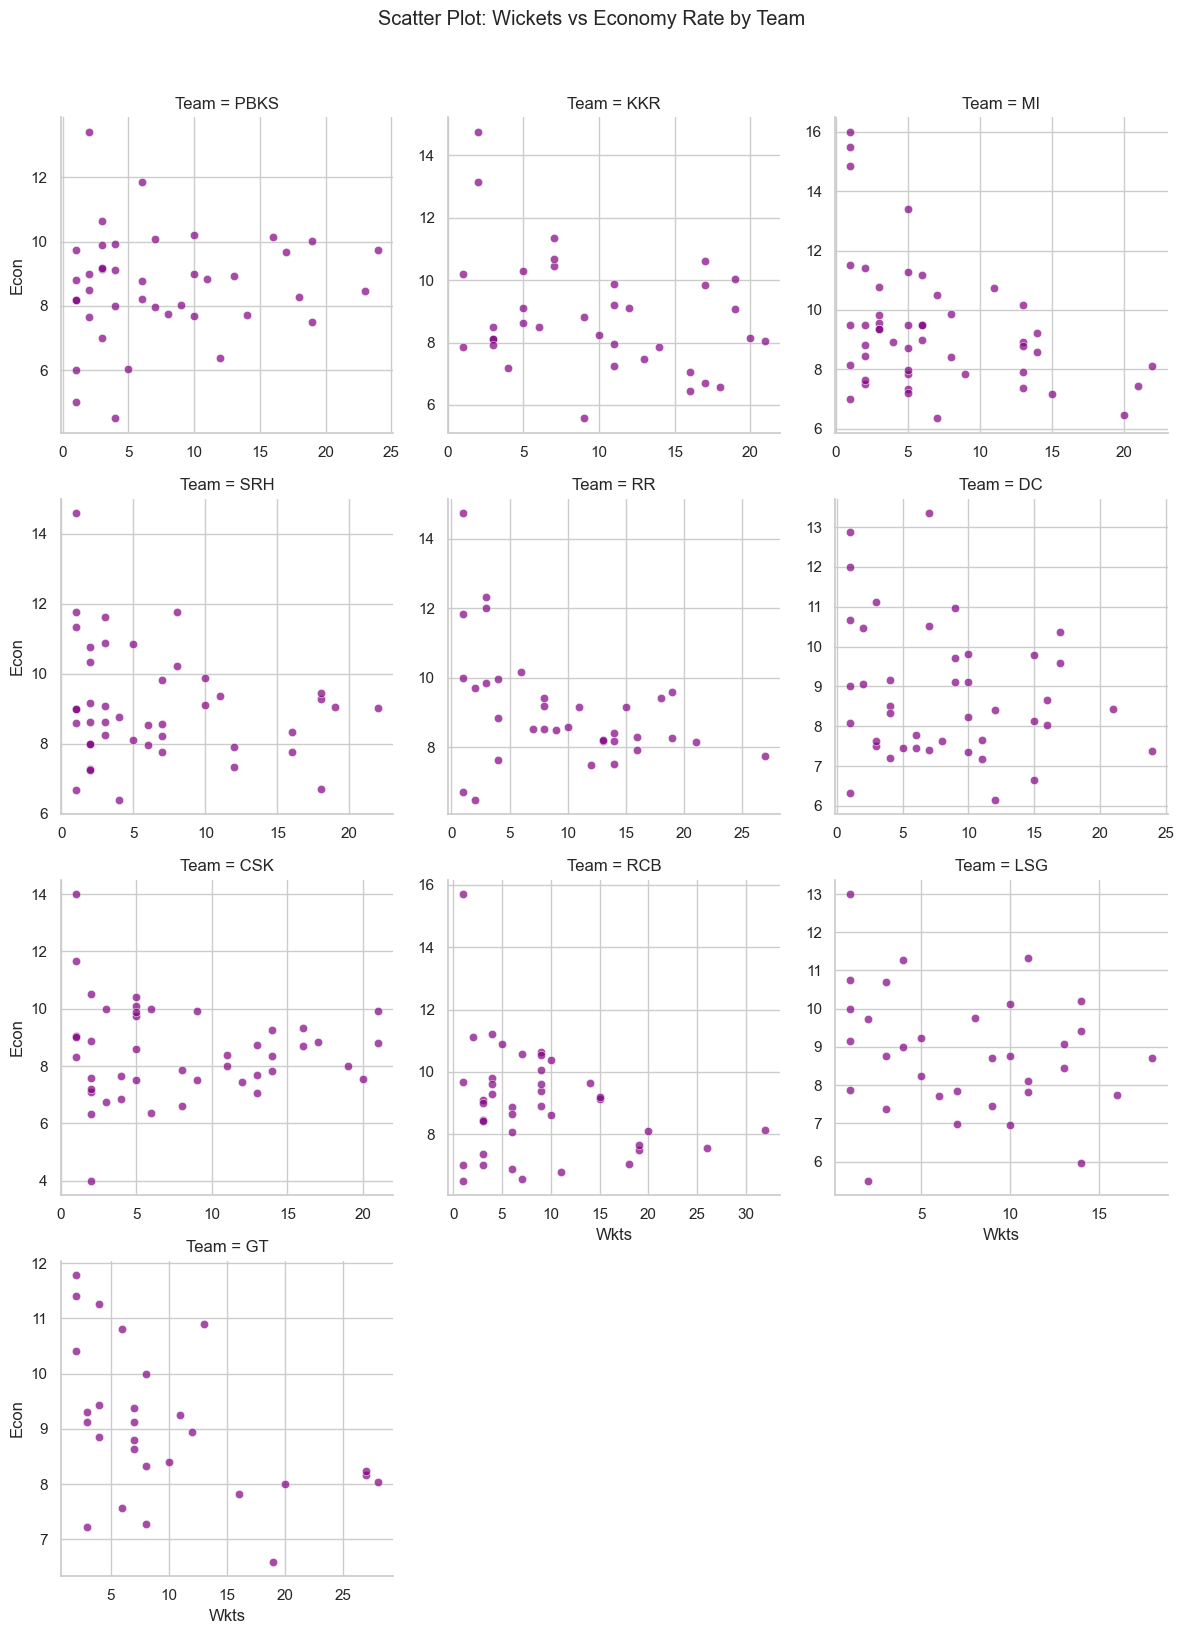

In [125]:
plt.figure(figsize=(10,5))
g = sns.FacetGrid(bowlers_df, col='Team', col_wrap=3, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x='Wkts', y='Econ', color='purple', alpha=0.7)
g.set_axis_labels('Wkts', 'Econ')
g.fig.suptitle('Scatter Plot: Wickets vs Economy Rate by Team', y=1.02)
plt.tight_layout()
plt.show()


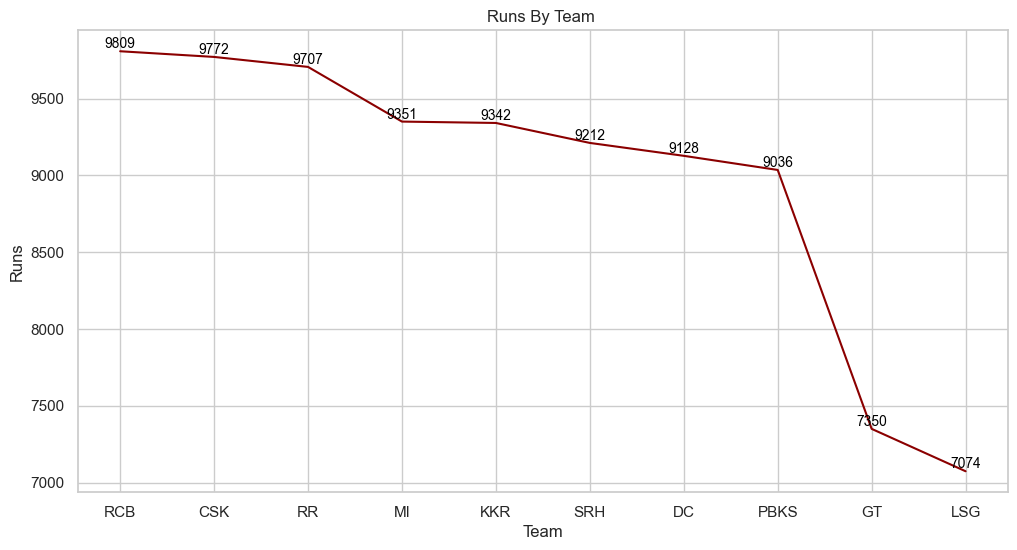

In [137]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=team_batsmen_performance, x='Team', y='Runs', color='darkred')
# Add numerical annotations for each point
for i in range(len(team_batsmen_performance)):
    plt.text(x=i, y=team_batsmen_performance['Runs'].iloc[i], 
             s=str(team_batsmen_performance['Runs'].iloc[i]), 
             ha='center', va='bottom', fontsize=10, color='black')


plt.title('Runs By Team ')
plt.show()

In [125]:
team_bowlers_performance

,Wkts,Econ,SR
Team,,,
KKR,355,8.854444,20.145000
CSK,354,8.481818,22.900682
DC,350,8.815714,22.443095
RCB,346,8.961500,21.312250
RR,327,9.082059,22.127353
MI,323,9.375208,23.770208
PBKS,315,8.615610,25.500000
SRH,294,9.066818,24.213636
GT,274,9.035714,20.424643


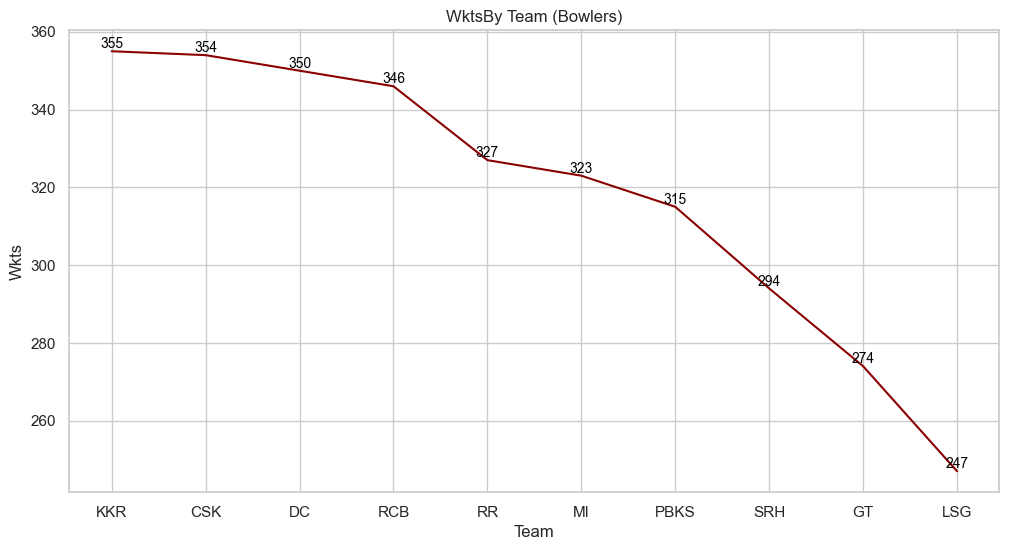

In [141]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=team_bowlers_performance, x='Team', y='Wkts', color='darkred')
# Add numerical annotations for each point
for i in range(len(team_bowlers_performance)):
    plt.text(x=i, y=team_bowlers_performance['Wkts'].iloc[i], 
             s=str(team_bowlers_performance['Wkts'].iloc[i]), 
             ha='center', va='bottom', fontsize=10, color='black')
plt.title('WktsBy Team (Bowlers)')
plt.show()

In [103]:
batsmen_df.dtypes

Unnamed: 0       int64
Player Name     object
Team            object
Year             int64
Mat              int64
Inns             int64
NO               int64
Runs             int64
HS               int64
Ave            float64
SR             float64
100              int64
50               int64
0                int64
4s               int64
6s               int64
dtype: object

In [ ]:
# Step 1: Filter out players who have been with the same team for 3 years
batsmen_filtered = batsmen_df.groupby('Player Name').filter(lambda x: len(x['Team'].unique()) > 1)
bowlers_filtered = bowlers_df.groupby('Player Name').filter(lambda x: len(x['Team'].unique()) > 1)

# Step 2: Top 5 Batsmen Based on Performance Metrics
batsmen_filtered['batting_score'] = batsmen_filtered['Runs'] * 0.3 + batsmen_filtered['Ave'] * 0.4 + batsmen_filtered['SR'] * 0.3
top_batsmen = batsmen_filtered.nlargest(5, 'batting_score')  # Top 5 batsmen

# Step 3: Top 4 Bowlers Based on Performance Metrics
bowlers_filtered['bowling_score'] = bowlers_filtered['Wkts'] * 0.4 + (1 / bowlers_filtered['Econ']) * 0.4 + (1 / bowlers_filtered['SR']) * 0.2
top_bowlers = bowlers_filtered.nlargest(4, 'bowling_score')  # Top 4 bowlers

# Step 4: Select Allrounders (top performers in both batting and bowling)
allrounders_filtered = batsmen_filtered[batsmen_filtered['Player Name'].isin(bowlers_filtered['Player Name'])]
allrounders_filtered['allrounder_score'] = allrounders_filtered['batting_score'] + allrounders_filtered['bowling_score']
top_allrounders = allrounders_filtered.nlargest(2, 'allrounder_score')  # Top 2 allrounders

# Step 5: Select Top Wicketkeeper Based on Batting and Keeping Stats
top_wicketkeeper = batsmen_filtered.nlargest(1, 'batting_score')  # Best wicketkeeper (best batter)

# Final Team Composition
final_team = pd.concat([top_batsmen, top_bowlers, top_allrounders, top_wicketkeeper])

# Display Final Team
print(final_team[['Player Name', 'Role', 'Team', 'Runs', 'Ave', 'SR', 'Wkts', 'Econ']])


In [58]:
# Step 1: Filter out players who have been with the same team for 3 years
batsmen_filtered = batsmen_df.groupby('Player Name').filter(lambda x: len(x['Team'].unique()) > 1)
bowlers_filtered = bowlers_df.groupby('Player Name').filter(lambda x: len(x['Team'].unique()) > 1)

In [167]:
batsmen_filtered = batsmen_filtered.drop(columns="Unnamed: 0")
batsmen_filtered

,Player Name,Team,Year,Mat,Inns,NO,Runs,HS,Ave,SR,100,50,0,4s,6s
6,KL Rahul,LSG,2024,14,14,0,520,82,37.14,136.12,0,4,0,45,19
7,N Pooran,LSG,2024,14,14,6,499,75,62.37,178.21,0,3,1,35,36
12,F du Plessis,RCB,2024,15,15,0,438,64,29.20,161.62,0,4,0,47,21
13,PD Salt,KKR,2024,12,12,1,435,89,39.54,182.00,0,4,1,50,24
15,Shubman Gill,GT,2024,12,12,1,426,104,38.72,147.40,1,2,0,37,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,TA Boult,MI,2021,14,4,4,1,1,0.00,25.00,0,0,0,0,0
595,BA Stokes,RR,2021,1,1,0,0,0,0.00,0.00,0,0,1,0,0
599,Anuj Rawat,RR,2021,2,1,0,0,0,0.00,0.00,0,0,1,0,0
601,JDS Neesham,MI,2021,3,2,0,0,0,0.00,0.00,0,0,2,0,0


In [171]:
bowlers_filtered = bowlers_filtered.drop(columns="Unnamed: 0")
bowlers_filtered

,Player Name,Team,Year,Mat,Inns,Balls,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,HV Patel,PBKS,2024,14,14,294,49,0,477,24,3/15,19.87,9.73,12.25,0,0
7,Avesh Khan,RR,2024,16,15,329,54,0,526,19,3/27,27.68,9.59,17.31,0,0
8,YS Chahal,RR,2024,15,15,348,58,0,546,18,3/11,30.33,9.41,19.33,0,0
9,PJ Cummins,SRH,2024,16,16,366,61,1,566,18,3/43,31.44,9.27,20.33,0,0
14,KK Ahmed,DC,2024,14,14,300,50,2,479,17,2/21,28.17,9.58,17.64,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,KM Asif,CSK,2021,1,1,13,2,0,18,1,1/18,18.00,8.30,13.00,0,0
380,GD Phillips,RR,2021,3,2,12,2,0,20,1,1/17,20.00,10.00,12.00,0,0
386,DR Sams,RCB,2021,2,2,36,6,0,39,1,1/24,39.00,6.50,36.00,0,0
389,FA Allen,PBKS,2021,4,3,66,11,1,90,1,1/22,90.00,8.18,66.00,0,0


In [68]:
# Step 2: Top 5 Batsmen Based on Performance Metrics
batsmen_filtered['batting_score'] = batsmen_filtered['Runs'] * 0.3 + batsmen_filtered['Ave'] * 0.4 + batsmen_filtered['SR'] * 0.3
top_batsmen = batsmen_filtered.nlargest(5, 'batting_score')  # Top 5 batsmen



In [72]:
top_batsmen

,Unnamed: 0,Player Name,Team,Year,Mat,Inns,NO,Runs,HS,Ave,SR,100,50,0,4s,6s,batting_score
151,152,Shubman Gill,GT,2023,17,17,2,890,129,59.33,157.80,3,4,1,85,33,338.072
152,153,F du Plessis,RCB,2023,14,14,1,730,84,56.15,153.68,0,8,0,60,36,287.564
455,456,KL Rahul,PBKS,2021,13,13,3,626,98,62.60,138.80,0,6,0,48,30,254.480
454,455,F du Plessis,CSK,2021,16,16,2,633,95,45.21,138.20,0,6,2,60,23,249.444
303,304,KL Rahul,LSG,2022,15,15,3,616,103,51.33,135.38,2,4,3,45,30,245.946


In [76]:
# Step 2: Calculate total runs and total wickets for each player
# For batsmen
batsmen_total_stats = batsmen_filtered.groupby('Player Name').agg(
    total_runs=('Runs', 'sum')  # if Wkts is in batsmen dataset (usually not, leave as it is for consistency)
).reset_index()

# For bowlers
bowlers_total_stats = bowlers_filtered.groupby('Player Name').agg(
    total_runs=('Runs', 'sum'),
    total_wickets=('Wkts', 'sum')
).reset_index()

In [78]:
batsmen_total_stats

,Player Name,total_runs
0,AK Markram,995
1,AM Rahane,709
2,Aman Hakim Khan,115
3,Anmolpreet Singh,139
4,Anuj Rawat,318
...,...,...
82,V Shankar,461
83,VG Arora,8
84,WP Saha,955
85,Washington Sundar,192


In [133]:
bat =batsmen_total_stats.nlargest(10, "total_runs")

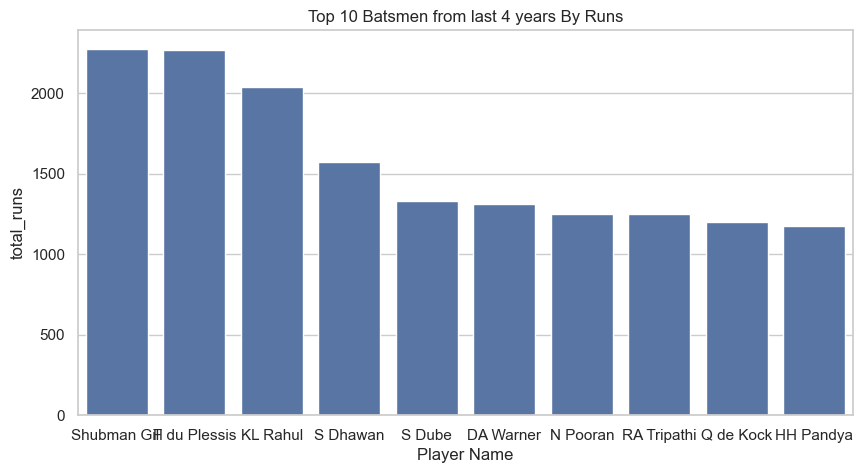

In [141]:
plt.figure(figsize=(10,5))
sns.barplot(data = bat , x = "Player Name", y = "total_runs")
plt.title("Top 10 Batsmen from last 4 years By Runs")
plt.show()

In [143]:
boll = bowlers_total_stats.nlargest(10, "total_wickets")

In [145]:
boll

,Player Name,total_wickets
10,HV Patel,89
43,YS Chahal,84
31,Rashid Khan,74
1,Avesh Khan,69
25,Mohammed Shami,67
39,TA Boult,58
14,K Rabada,56
32,Ravi Bishnoi,51
35,SN Thakur,48
16,KK Ahmed,47


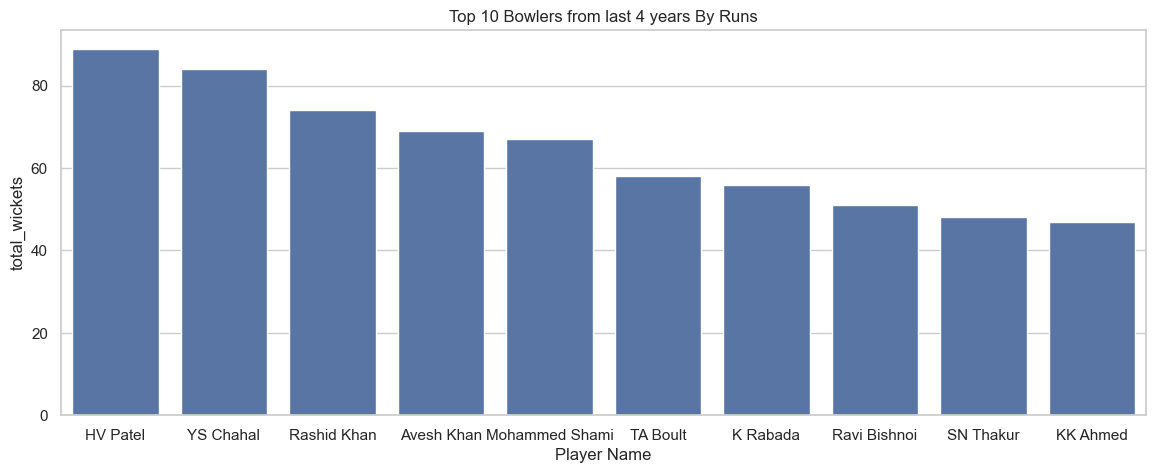

In [151]:
plt.figure(figsize=(14,5))
sns.barplot(data = boll , x = "Player Name", y = "total_wickets")
plt.title("Top 10 Bowlers from last 4 years By Runs")
plt.show()

In [70]:
# Step 3: Top 4 Bowlers Based on Performance Metrics
bowlers_filtered['bowling_score'] = bowlers_filtered['Wkts'] * 0.4 + (1 / bowlers_filtered['Econ']) * 0.4 + (1 / bowlers_filtered['SR']) * 0.2
top_bowlers = bowlers_filtered.nlargest(4, 'bowling_score')  # Top 4 bowlers

In [80]:
top_bowlers

,Unnamed: 0,Player Name,Team,Year,Mat,Inns,Balls,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5,bowling_score
303,304,HV Patel,RCB,2021,15,15,338,56,0,459,32,5/27,14.34,8.14,10.56,1,1,12.868079
101,102,Mohammed Shami,GT,2023,17,17,390,65,2,522,28,4/11,18.64,8.03,13.92,2,0,11.264181
202,203,YS Chahal,RR,2022,17,17,408,68,0,527,27,5/40,19.51,7.75,15.11,1,1,10.864849
103,104,Rashid Khan,GT,2023,17,17,402,67,0,552,27,4/30,20.44,8.23,14.88,1,0,10.862044


In [122]:
import pandas as pd

# Step 1: Select Top 5 Batsmen
top_batsmen = batsmen_total_stats.sort_values(by="total_runs", ascending=False).head(5)
top_batsmen["Role"] = "Batsman"

# Step 2: Select Top 4 Bowlers
top_bowlers = bowlers_total_stats.sort_values(by="total_wickets", ascending=False).head(4)
top_bowlers["Role"] = "Bowler"

# Step 3: Select Top 2 Allrounders
allrounders = pd.merge(
    batsmen_total_stats,
    bowlers_total_stats,
    on="Player Name",
    how="inner",
    suffixes=("_bat", "_bowl")
)
allrounders["allrounder_score"] = (
    allrounders["total_runs_bat"] * 0.4 + allrounders["total_wickets"] * 0.6
)
top_allrounders = allrounders.sort_values(by="allrounder_score", ascending=False).head(2)
top_allrounders["Role"] = "Allrounder"

# Step 4: Select Top Wicketkeeper (Best Batsman among those who are wicketkeepers)
# Filter for wicketkeepers and pick the top-performing one based on total_runs
wicketkeeper = batsmen_filtered[batsmen_filtered["Player Name"].isin(["wicketkeeper_1", "wicketkeeper_2"])]
top_wicketkeeper = wicketkeeper.nlargest(1, "total_runs")
top_wicketkeeper["Role"] = "Wicketkeeper"

# Step 5: Combine into Playing 11
playing_11 = pd.concat([top_batsmen, top_bowlers, top_allrounders, top_wicketkeeper]).reset_index(drop=True)

# Step 6: Display the Playing 11
print(playing_11[["Player Name", "Role", "total_runs", "total_wickets"]])


     Player Name        Role  total_runs  total_wickets
0   Shubman Gill     Batsman      2277.0            NaN
1   F du Plessis     Batsman      2269.0            NaN
2       KL Rahul     Batsman      2036.0            NaN
3       S Dhawan     Batsman      1572.0            NaN
4         S Dube     Batsman      1333.0            NaN
5       HV Patel      Bowler      1800.0           89.0
6      YS Chahal      Bowler      1879.0           84.0
7    Rashid Khan      Bowler      1715.0           74.0
8     Avesh Khan      Bowler      1675.0           69.0
9      HH Pandya  Allrounder         NaN           22.0
10    MP Stoinis  Allrounder         NaN           15.0


In [112]:
final_team_display

,Player Name,Role,Team,Runs,Ave,SR,Wkts,Econ,total_runs,total_wickets
59,Shubman Gill,Batsman,GT,890,59.33,157.80,NaN,NaN,2277,NaN
60,F du Plessis,Batsman,RCB,730,56.15,153.68,NaN,NaN,2269,NaN
196,KL Rahul,Batsman,PBKS,626,62.60,138.80,NaN,NaN,2036,NaN
195,F du Plessis,Batsman,CSK,633,45.21,138.20,NaN,NaN,2269,NaN
122,KL Rahul,Batsman,LSG,616,51.33,135.38,NaN,NaN,2036,NaN
101,HV Patel,Bowler,RCB,459,14.34,10.56,32.0,8.14,1800,89.0
31,Mohammed Shami,Bowler,GT,522,18.64,13.92,28.0,8.03,1405,67.0
63,YS Chahal,Bowler,RR,527,19.51,15.11,27.0,7.75,1879,84.0
32,Rashid Khan,Bowler,GT,552,20.44,14.88,27.0,8.23,1715,74.0
69,C Green,Allrounder,MI,452,50.22,160.28,NaN,NaN,707,NaN


In [29]:
import pandas as pd

# Assuming batsmen_df and bowlers_df are the cleaned dataframes

# Step 1: Filter players who played for multiple teams in the last 3 years
batsmen_filtered = batsmen_df.groupby('Player Name').filter(lambda x: len(x['Team'].unique()) > 1)
bowlers_filtered = bowlers_df.groupby('Player Name').filter(lambda x: len(x['Team'].unique()) > 1)

# Step 2: Calculate total runs for batsmen
batsmen_total_stats = batsmen_filtered.groupby('Player Name').agg(
    total_runs=('Runs', 'sum')
).reset_index()

# Calculate total runs and wickets for bowlers
bowlers_total_stats = bowlers_filtered.groupby('Player Name').agg(
    total_wickets=('Wkts', 'sum')
).reset_index()

# Step 3: Identify allrounders by performing an inner join on both tables
allrounders = pd.merge(
    batsmen_total_stats,
    bowlers_total_stats,
    on="Player Name",
    how="inner"
)

# Step 5: Select top Allrounders based on total_runs and total_wickets
allrounders["allrounder_score"] = allrounders["total_runs"] * 0.5 + allrounders["total_wickets"] * 0.5
top_allrounders = allrounders.nlargest(3, "allrounder_score")
top_allrounders["Role"] = "Allrounder"

# Step 4: Select top batsmen
batsmen = pd.merge(right = bowlers_total_stats ,left = batsmen_total_stats,on="Player Name",how="left")
top_batsmen = batsmen.nlargest(4, "total_runs")  # Top 4 batsmen to form the lineup
top_batsmen["Role"] = "Batsman"

# Step 5: Select top bowlers
bowler = pd.merge(left = bowlers_total_stats ,right = batsmen_total_stats,on="Player Name",how="right")
top_bowlers = bowler.nlargest(4, "total_wickets")
top_bowlers["Role"] = "Bowler"

# Step 6: Combine all players to form the Playing XI
playing_11 = pd.concat([top_batsmen, top_bowlers, top_allrounders]).reset_index(drop=True)

# Step 7: Sort the players based on Role (Batsman -> Allrounder -> Bowler)
role_order = {"Batsman": 1, "Allrounder": 2, "Bowler": 3}
playing_11["Role_Order"] = playing_11["Role"].map(role_order)
playing_11 = playing_11.sort_values(by="Role_Order").drop(columns=["Role_Order"]).reset_index(drop=True)

# Step 8: Display the final Playing XI with the desired columns
playing_11 = playing_11[["Player Name", "Role", "total_runs", "total_wickets"]]

# Display the Playing XI
print(playing_11)
playing_11


     Player Name        Role  total_runs  total_wickets
0   Shubman Gill     Batsman        2277            NaN
1   F du Plessis     Batsman        2269            NaN
2       KL Rahul     Batsman        2036            NaN
3       S Dhawan     Batsman        1572            NaN
4      HH Pandya  Allrounder        1176           22.0
5     MP Stoinis  Allrounder        1041           15.0
6       DJ Hooda  Allrounder         840            3.0
7       HV Patel      Bowler         121           89.0
8      YS Chahal      Bowler          15           84.0
9    Rashid Khan      Bowler         406           74.0
10    Avesh Khan      Bowler          37           69.0


,Player Name,Role,total_runs,total_wickets
0,Shubman Gill,Batsman,2277,NaN
1,F du Plessis,Batsman,2269,NaN
2,KL Rahul,Batsman,2036,NaN
3,S Dhawan,Batsman,1572,NaN
4,HH Pandya,Allrounder,1176,22.0
5,MP Stoinis,Allrounder,1041,15.0
6,DJ Hooda,Allrounder,840,3.0
7,HV Patel,Bowler,121,89.0
8,YS Chahal,Bowler,15,84.0
9,Rashid Khan,Bowler,406,74.0


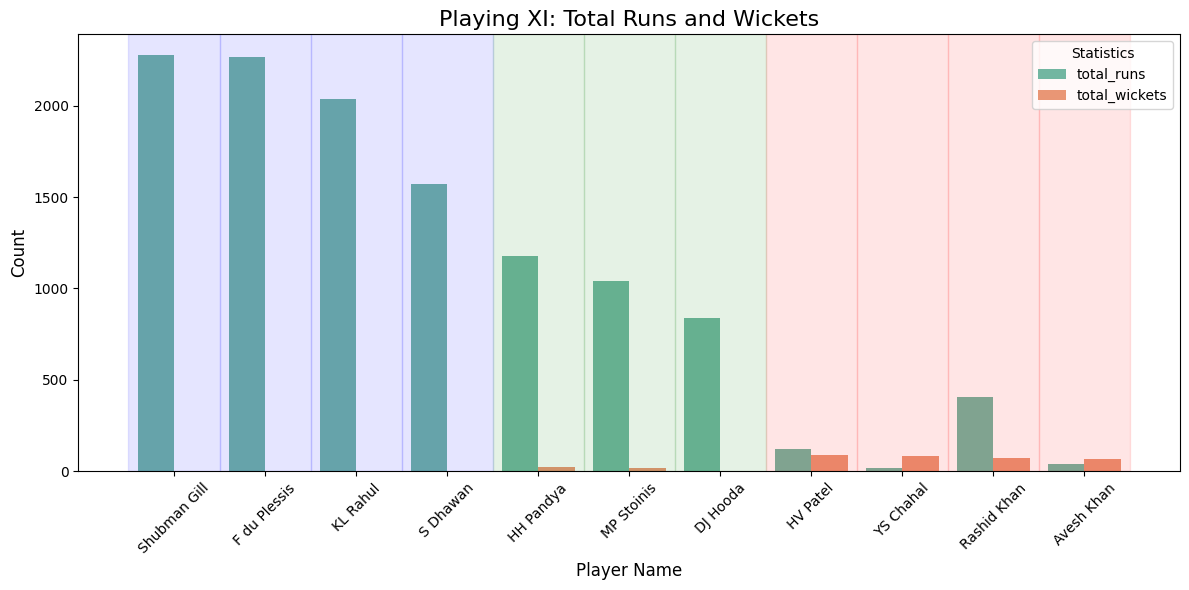

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a color palette
palette = {
    "Batsman": "blue",
    "Allrounder": "green",
    "Bowler": "red"
}

# Create a long-form DataFrame for easier plotting
playing_11_melted = playing_11.melt(
    id_vars=["Player Name", "Role"],
    value_vars=["total_runs", "total_wickets"],
    var_name="Statistic",
    value_name="Value"
)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Player Name",
    y="Value",
    hue="Statistic",
    data=playing_11_melted,
    palette="Set2",
    dodge=True
)

# Highlight roles in the background with color bands
for index, row in playing_11.iterrows():
    plt.axvspan(index - 0.5, index + 0.5, color=palette[row["Role"]], alpha=0.1)

# Add titles and labels
plt.title("Playing XI: Total Runs and Wickets", fontsize=16)
plt.xlabel("Player Name", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Statistics", loc="upper right")
plt.tight_layout()

# Show the plot
plt.show()


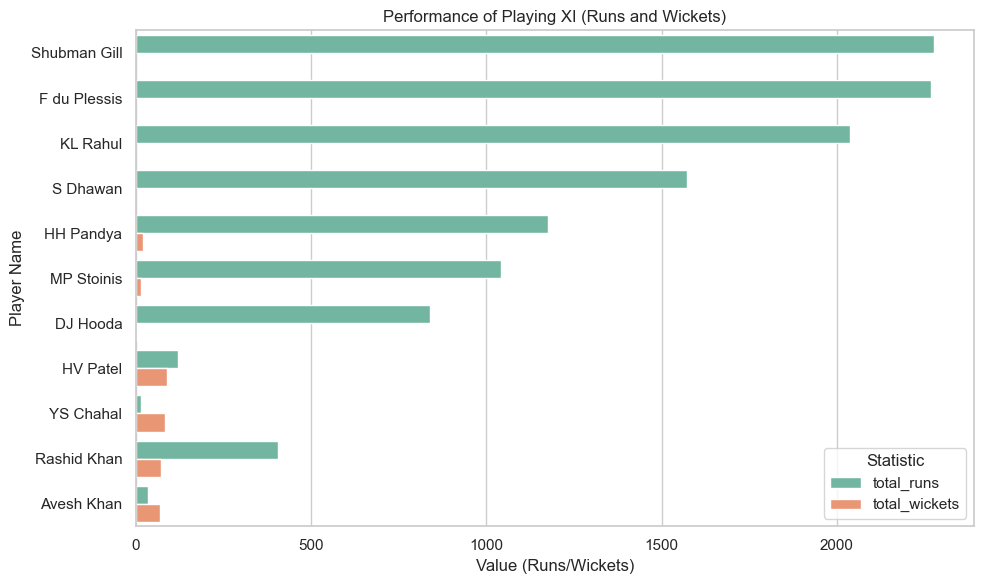

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create a bar plot for total_runs and total_wickets
playing_11_melted = playing_11.melt(id_vars=["Player Name", "Role"], 
                                    value_vars=["total_runs", "total_wickets"], 
                                    var_name="Statistic", 
                                    value_name="Value")

# Create the bar plot
sns.barplot(x="Value", y="Player Name", hue="Statistic", data=playing_11_melted, 
            dodge=True, palette="Set2")

# Set plot labels and title
plt.xlabel("Value (Runs/Wickets)")
plt.ylabel("Player Name")
plt.title("Performance of Playing XI (Runs and Wickets)")
plt.legend(title="Statistic")

# Show the plot
plt.tight_layout()
plt.show()


In [248]:
playing_11.drop(columns="allrounder_score")

,Player Name,total_runs,total_wickets,Role
0,Shubman Gill,2277,NaN,Batsman
1,F du Plessis,2269,NaN,Batsman
2,KL Rahul,2036,NaN,Batsman
3,S Dhawan,1572,NaN,Batsman
4,HV Patel,121,89.0,Bowler
5,YS Chahal,15,84.0,Bowler
6,Rashid Khan,406,74.0,Bowler
7,Avesh Khan,37,69.0,Bowler
8,HH Pandya,1176,22.0,Allrounder
9,MP Stoinis,1041,15.0,Allrounder


In [250]:
playing_11 = playing_11[["Player Name","Role","total_runs","total_wickets"]]

In [252]:
playing_11

,Player Name,Role,total_runs,total_wickets
0,Shubman Gill,Batsman,2277,NaN
1,F du Plessis,Batsman,2269,NaN
2,KL Rahul,Batsman,2036,NaN
3,S Dhawan,Batsman,1572,NaN
4,HV Patel,Bowler,121,89.0
5,YS Chahal,Bowler,15,84.0
6,Rashid Khan,Bowler,406,74.0
7,Avesh Khan,Bowler,37,69.0
8,HH Pandya,Allrounder,1176,22.0
9,MP Stoinis,Allrounder,1041,15.0


In [142]:
playing_11.drop(columns="allrounder_score")

,Player Name,total_runs,Role,total_wickets
0,Shubman Gill,2277.0,Batsman,NaN
1,F du Plessis,2269.0,Batsman,NaN
2,KL Rahul,2036.0,Batsman,NaN
3,S Dhawan,1572.0,Batsman,NaN
4,HV Patel,NaN,Bowler,89.0
5,YS Chahal,NaN,Bowler,84.0
6,Rashid Khan,NaN,Bowler,74.0
7,Avesh Khan,NaN,Bowler,69.0
8,HH Pandya,1176.0,Allrounder,22.0
9,MP Stoinis,1041.0,Allrounder,15.0


In [159]:
# Step 5: Select top Allrounders based on total_runs and total_wickets
allrounders["allrounder_score"] = allrounders["total_runs"] * 0.5 + allrounders["total_wickets"] * 0.5
top_allrounders = allrounders.nlargest(10, "allrounder_score")

In [161]:
top_allrounders

,Player Name,total_runs,total_wickets,allrounder_score
8,HH Pandya,1176,22,599.0
16,MP Stoinis,1041,15,528.0
4,DJ Hooda,840,3,421.5
1,C Green,707,16,361.5
13,KH Pandya,647,30,338.5
25,SM Curran,602,35,318.5
27,Shahbaz Ahmed,535,18,276.5
22,Rashid Khan,406,74,240.0
20,R Ashwin,388,42,215.0
28,T Stubbs,403,4,203.5


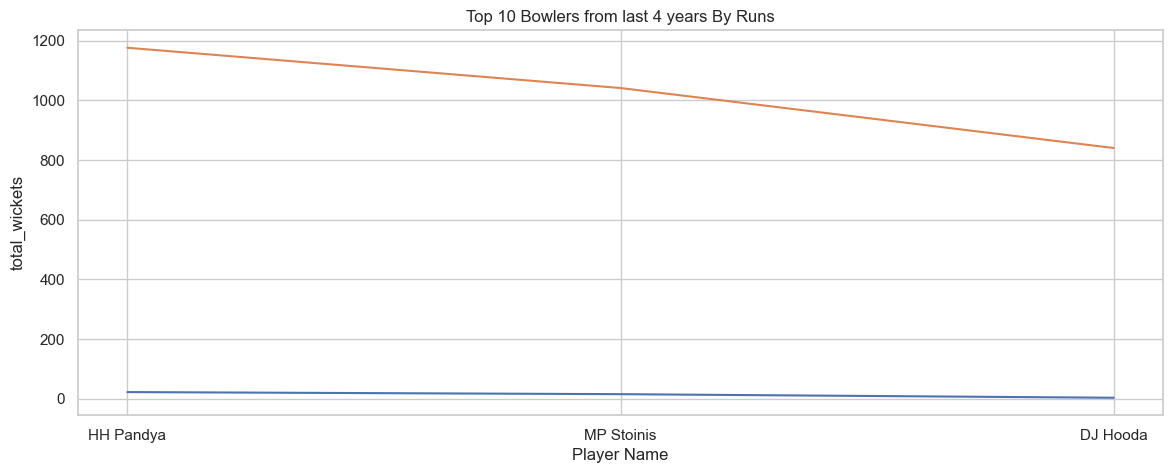

In [157]:
plt.figure(figsize=(14,5))
sns.lineplot(data = top_allrounders , x = "Player Name", y = "total_wickets")
sns.lineplot(data = top_allrounders , x = "Player Name", y = "total_runs")
plt.title("Top 10 Bowlers from last 4 years By Runs")
plt.show()

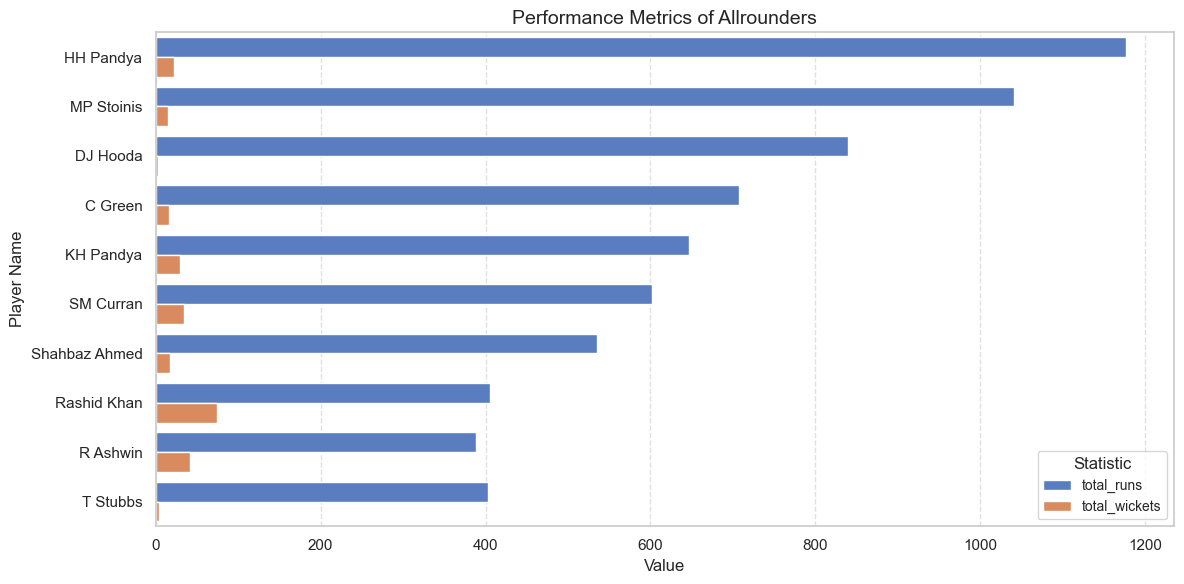

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = {
    "Player Name": ["HH Pandya", "MP Stoinis", "DJ Hooda", "C Green", "KH Pandya", 
                    "SM Curran", "Shahbaz Ahmed", "Rashid Khan", "R Ashwin", "T Stubbs"],
    "total_runs": [1176, 1041, 840, 707, 647, 602, 535, 406, 388, 403],
    "total_wickets": [22, 15, 3, 16, 30, 35, 18, 74, 42, 4],
    
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set plot style and size
plt.figure(figsize=(12, 6))

# Melt data for visualization
df_melted = df.melt(id_vars="Player Name", value_vars=["total_runs", "total_wickets"], 
                    var_name="Statistic", value_name="Value")

# Create a grouped bar plot
sns.barplot(x="Value", y="Player Name", hue="Statistic", data=df_melted, palette="muted")

# Add titles and labels
plt.title("Performance Metrics of Allrounders", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Player Name", fontsize=12)
plt.legend(title="Statistic", fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
